In [2]:
import numpy as np
from sklearn.model_selection import train_test_split, train_test_split
import pandas as pd

import utils.data as d
import utils.load_data as ld
import utils.load_SAM40_data as ld_SAM40
import utils.features as f
import utils.classifiers as clfs
import utils.variables as v
import utils.metrics as m

In [3]:
#Collected dataset needs to be resampled, tak a look in improve_ica

In [4]:
data_type = '128Hz_raw'
label_type = 'stai'
feature_type = f.time_series_features
kfold = True
new_ica = True


train_data, test_data, train_labels, test_labels = ld.load_and_shape_data(data_type, label_type, feature_type, kfold, new_ica)

---- Generating all recordings ----
All records generated

---- Filtering out invalid recordings ----
ERROR 1) Failed to read data for recording P006_S002_001
ERROR 1) Failed to read data for recording P006_S002_002
ERROR 1) Failed to read data for recording P010_S001_001
ERROR 1) Failed to read data for recording P013_S001_001
ERROR 1) Failed to read data for recording P013_S001_002
ERROR 1) Failed to read data for recording P020_S001_001
ERROR 1) Failed to read data for recording P023_S002_002
ERROR 1) Failed to read data for recording P028_S002_001
ERROR 1) Failed to read data for recording P028_S002_002

---- Returning valid recordings ----
['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_

In [5]:
print(train_data.shape)

(480, 9600)


In [6]:
clfs.svm_classification(train_data, test_data, train_labels, test_labels)

KeyboardInterrupt: 

SFREQ:  128
12
266
Features shape: (960, 798)
SAM40 test data shape: (960, 798)
SAM40 test labels shape: (960,)
Scaling training and testing data
Scaling SAM40 data
Finding the best model
SVC(C=10)
{'C': 10, 'kernel': 'rbf'}
Predicting on test data
Number of results: 40
accuracies: [0.7375     0.6        0.6        0.6        0.74583333 0.58958333
 0.6        0.6        0.70208333 0.59375    0.71875    0.625
 0.70625    0.59791667 0.74791667 0.70625    0.70625    0.59375
 0.7625     0.68541667 0.70625    0.59583333 0.74791667 0.67083333
 0.70625    0.63541667 0.74791667 0.67291667 0.70625    0.71666667
 0.75       0.67291667 0.70625    0.70416667 0.75       0.67291667
 0.70625    0.63333333 0.75       0.67291667]


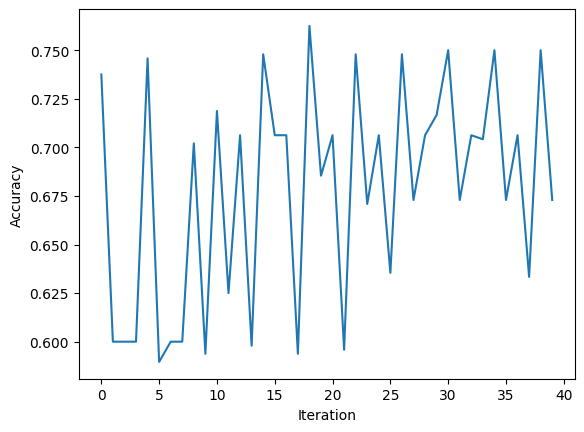

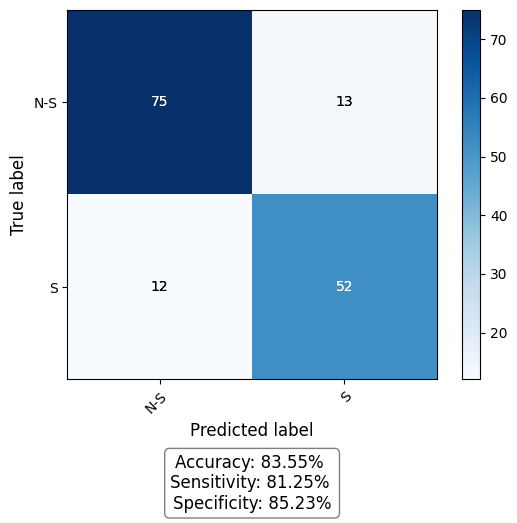

Predicting on SAM40 data


ValueError: Found input variables with inconsistent numbers of samples: [960, 480]

In [7]:
SAM40_data, SAM40_labels = ld.load_and_shape_SAM40_data()

clfs.svm_classification_SAM40(train_data, test_data, SAM40_data, train_labels, test_labels, SAM40_labels)